<a href="https://colab.research.google.com/github/hg210704/AdvanceAI-Practical/blob/main/BFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starting BFS Search...
BFS Solution Path:
[[1 2 3]
 [4 5 6]
 [0 7 8]]
[[1 2 3]
 [4 5 6]
 [7 0 8]]
[[1 2 3]
 [4 5 6]
 [7 8 0]]


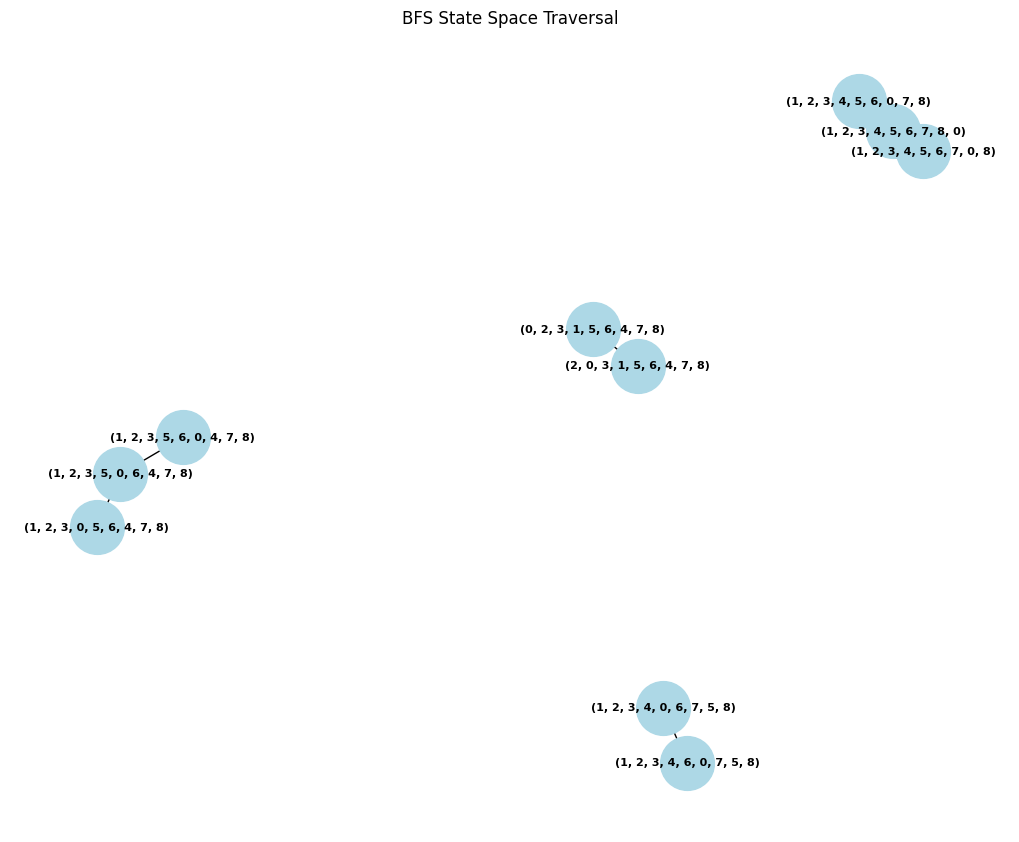


Starting DFS Search...
DFS Solution Path:
[[1 2 3]
 [4 5 6]
 [0 7 8]]
[[1 2 3]
 [4 5 6]
 [7 0 8]]
[[1 2 3]
 [4 5 6]
 [7 8 0]]


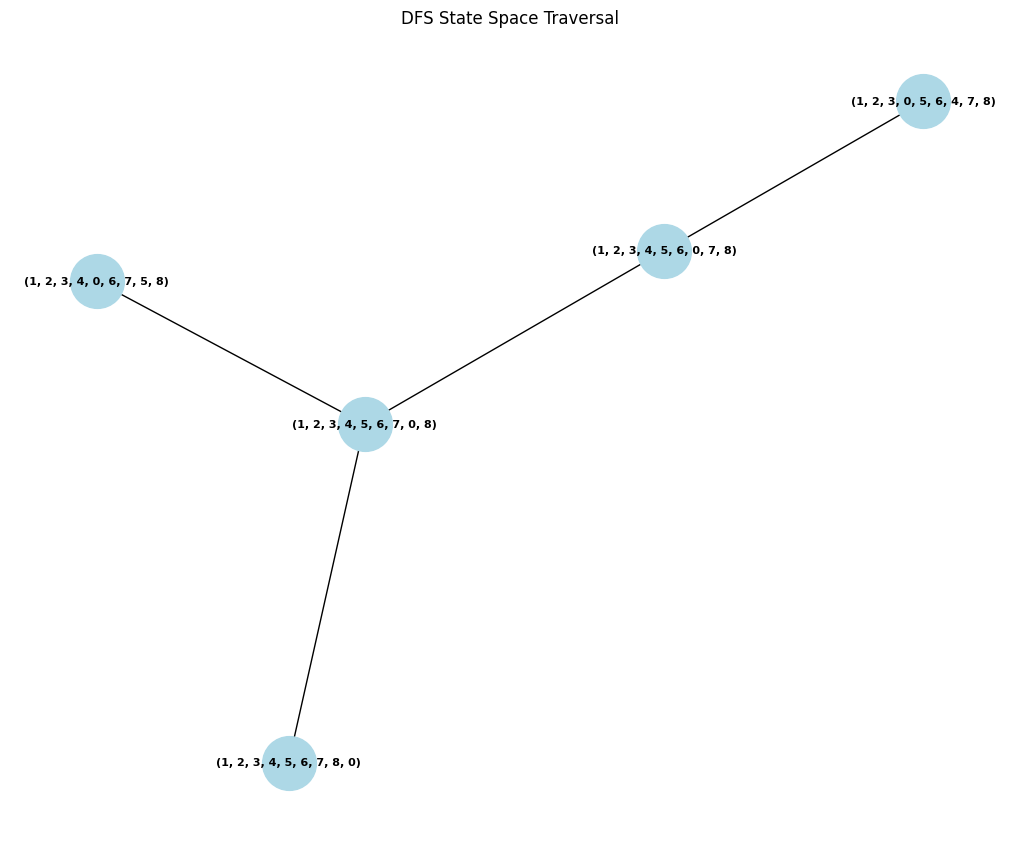

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

# Define the move directions (Up, Down, Left, Right)
moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]

def get_blank_position(state):
    """Returns the position (row, col) of the blank space (0)."""
    return tuple(np.argwhere(state == 0)[0])

def get_possible_moves(state):
    """Returns all possible next states by moving the blank space."""
    blank_pos = get_blank_position(state)
    possible_states = []

    for move in moves:
        new_pos = (blank_pos[0] + move[0], blank_pos[1] + move[1])

        if 0 <= new_pos[0] < 3 and 0 <= new_pos[1] < 3:
            new_state = np.copy(state)
            new_state[blank_pos], new_state[new_pos] = new_state[new_pos], new_state[blank_pos]
            possible_states.append(new_state)

    return possible_states

def bfs_search(initial_state, goal_state):
    """Performs BFS to find the solution path from initial_state to goal_state."""
    visited = set()
    queue = deque([(initial_state, [])])  # (state, path)
    visited.add(tuple(initial_state.reshape(-1)))

    state_graph = {}  # To store the state graph

    while queue:
        current_state, path = queue.popleft()

        # If goal state is reached, return the solution path
        if np.array_equal(current_state, goal_state):
            return path + [current_state], state_graph

        # Generate all possible moves
        for next_state in get_possible_moves(current_state):
            next_state_tuple = tuple(next_state.reshape(-1))
            if next_state_tuple not in visited:
                visited.add(next_state_tuple)
                queue.append((next_state, path + [current_state]))

                # Record the current state and its neighbors in the graph
                state_graph[tuple(current_state.reshape(-1))] = [tuple(next_state.reshape(-1))]

    return None, None  # If no solution

def dfs_search(initial_state, goal_state):
    """Performs DFS to find the solution path from initial_state to goal_state."""
    visited = set()
    stack = [(initial_state, [])]  # (state, path)
    visited.add(tuple(initial_state.reshape(-1)))

    state_graph = {}  # To store the state graph

    while stack:
        current_state, path = stack.pop()

        # If goal state is reached, return the solution path
        if np.array_equal(current_state, goal_state):
            return path + [current_state], state_graph

        # Generate all possible moves
        for next_state in get_possible_moves(current_state):
            next_state_tuple = tuple(next_state.reshape(-1))
            if next_state_tuple not in visited:
                visited.add(next_state_tuple)
                stack.append((next_state, path + [current_state]))

                # Record the current state and its neighbors in the graph
                if tuple(current_state.reshape(-1)) not in state_graph:
                    state_graph[tuple(current_state.reshape(-1))] = []
                state_graph[tuple(current_state.reshape(-1))].append(next_state_tuple)

    return None, None  # If no solution

def visualize_graph(state_graph, search_type="Search"):
    """Visualizes the traversal graph using NetworkX."""
    G = nx.Graph()
    for state, neighbors in state_graph.items():
        for neighbor in neighbors:
            G.add_edge(str(state), str(neighbor))

    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_size=1500, node_color='lightblue', font_size=8, font_weight='bold')
    plt.title(f"{search_type} State Space Traversal")
    plt.show()

def visualize_puzzle(state, ax, title="Puzzle State"):
    """Visualizes a single puzzle state."""
    ax.imshow(state, cmap='tab20', vmin=0, vmax=9)
    ax.set_xticks(np.arange(3))
    ax.set_yticks(np.arange(3))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    for i in range(3):
        for j in range(3):
            ax.text(j, i, state[i, j] if state[i, j] != 0 else '',
                    ha='center', va='center', color='white', fontsize=20)
    ax.grid(color='black')
    ax.set_title(title)

# Initial and Goal states for the 8-puzzle
initial_state = np.array([[1, 2, 3], [4, 5, 6], [0, 7, 8]])
goal_state = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 0]])

# Perform BFS search
print("Starting BFS Search...")
bfs_solution, bfs_graph = bfs_search(initial_state, goal_state)
if bfs_solution:
    print("BFS Solution Path:")
    for state in bfs_solution:
        print(state)
    visualize_graph(bfs_graph, search_type="BFS")
else:
    print("No solution found in BFS.")

# Perform DFS search
print("\nStarting DFS Search...")
dfs_solution, dfs_graph = dfs_search(initial_state, goal_state)
if dfs_solution:
    print("DFS Solution Path:")
    for state in dfs_solution:
        print(state)
    visualize_graph(dfs_graph, search_type="DFS")
else:
    print("No solution found in DFS.")


BFS Path: ['A', 'B', 'D', 'G']
DFS Path: ['A', 'C', 'F', 'G']
BFS Path Length: 4
DFS Path Length: 4
BFS and DFS found paths of the same length


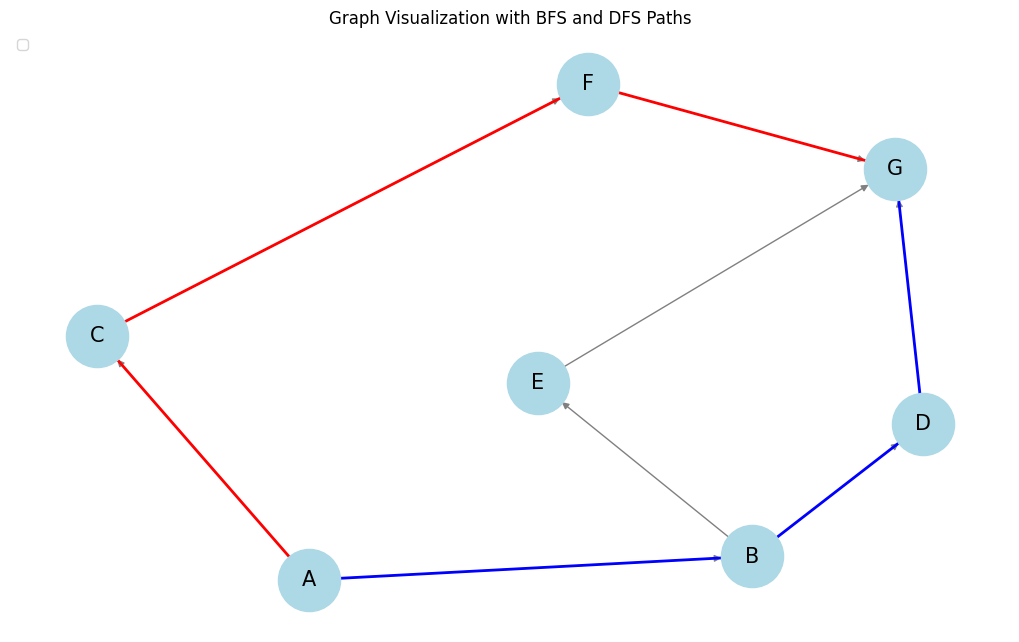

In [20]:
import collections
import networkx as nx
import matplotlib.pyplot as plt
def breadth_first_search(graph, start, goal):
    queue = collections.deque([(start, [start])])
    visited = set()

    while queue:
        (vertex, path) = queue.popleft()
        if vertex not in visited:
            if vertex == goal:
                return path
            visited.add(vertex)
            for neighbor in graph[vertex]:
                if neighbor not in visited:
                    queue.append((neighbor, path + [neighbor]))
    return None  # No path found
def depth_first_search(graph, start, goal):
    stack = [(start, [start])]
    visited = set()

    while stack:
        (vertex, path) = stack.pop()
        if vertex not in visited:
            if vertex == goal:
                return path
            visited.add(vertex)
            for neighbor in graph[vertex]:
                if neighbor not in visited:
                    stack.append((neighbor, path + [neighbor]))

    return None  # No path found
# Visualization function
def visualize_graph(graph, bfs_path=None, dfs_path=None):
    G = nx.DiGraph()
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 6))
# Visualization function
def visualize_graph(graph, bfs_path=None, dfs_path=None):
    G = nx.DiGraph()
    for node, neighbors in graph.items():
        for neighbor in neighbors:
            G.add_edge(node, neighbor)

    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 6))

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=15)

    # Highlight BFS path if available
    if bfs_path:
        bfs_edges = list(zip(bfs_path, bfs_path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=bfs_edges, edge_color="blue", width=2, label="BFS Path")

    # Highlight DFS path if available
    if dfs_path:
        dfs_edges = list(zip(dfs_path, dfs_path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=dfs_edges, edge_color="red", width=2, label="DFS Path")

    plt.legend(loc="upper left")
    plt.title("Graph Visualization with BFS and DFS Paths")
    plt.show()
# Example graph representing a planning problem
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': ['G'],
    'E': ['G'],
    'F': ['G'],
    'G': []
}
start_node = 'A'
goal_node = 'G'
# BFS
bfs_path = breadth_first_search(graph, start_node, goal_node)
print("BFS Path:", bfs_path)

# DFS
dfs_path = depth_first_search(graph, start_node, goal_node)
print("DFS Path:", dfs_path)

# Comparison
if bfs_path and dfs_path:
    print("BFS Path Length:", len(bfs_path))
    print("DFS Path Length:", len(dfs_path))
    if len(bfs_path) < len(dfs_path):
        print("BFS found a shorter path.")
    elif len(bfs_path) > len(dfs_path):
        print("DFS found a shorter path.")
    else:
        print("BFS and DFS found paths of the same length")
elif bfs_path:
    print("BFS found a path, but DFS did not.")
elif dfs_path:
    print("DFS found a path, but BFS did not.")
else:
    print("Neither BFS nor DFS found a path.")

# Visualize the graph
visualize_graph(graph, bfs_path, dfs_path)